## 1. Sentiment Analysis

In [61]:
 # Imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [62]:
# Read your api key environment variable
api_key = os.getenv("newsapi_api_key")

In [63]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [64]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy"
)

In [65]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum", language="en", sort_by="relevancy"
)

In [66]:
# Create the Bitcoin sentiment scores DataFrame
ethereum_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

In [67]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

In [68]:
ethereum_df

,compound,negative,neutral,positive,text
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
2,-0.2960,0.061,0.939,0.000,It wasn't long ago that your average person ha...
3,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
4,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu..."
5,0.7717,0.000,0.806,0.194,"Ether holders have ""staked"" more than $13 bill..."
6,0.6249,0.000,0.850,0.150,Ether is the cryptocurrency of the ethereum ne...
7,0.4019,0.000,0.920,0.080,Major upgrades to the ethereum network could h...
8,0.4939,0.000,0.914,0.086,You’ve likely seen the headlines surrounding t...
9,0.0000,0.000,1.000,0.000,While the ambitions of crypto investors have s...


In [69]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.00000
mean,0.007505,0.044450,0.899050,0.05645
std,0.398230,0.053827,0.078746,0.06691
min,-0.612400,0.000000,0.705000,0.00000
25%,-0.381800,0.000000,0.840250,0.00000
50%,0.000000,0.028500,0.903500,0.00000
75%,0.231275,0.077000,0.956500,0.11150
max,0.726400,0.184000,1.000000,0.17800


In [70]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.193535,0.027600,0.901650,0.070750
std,0.397977,0.035596,0.065204,0.068345
min,-0.381800,0.000000,0.782000,0.000000
25%,-0.074000,0.000000,0.847500,0.000000
50%,0.305600,0.000000,0.920000,0.075000
75%,0.502100,0.067500,0.928500,0.129500
max,0.771700,0.080000,1.000000,0.194000


### Questions:
**Q: Which coin had the highest mean positive score?
A:** 

**Q: Which coin had the highest compound score?
A:** 

**Q. Which coin had the highest positive score?
A:**

## 2. Natural Language Processing


In [71]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [72]:
 # Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary

In [73]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the stop words
    sw= set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    
    # Create a tokenized list of the words
    words= word_tokenize(re_clean)
    
    # Lemmatize words into root words 
    lem=[lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [74]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, ha, r..."
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
4,0.2023,0.058,0.833,0.108,"LONDON, June 23 (Reuters) - El Salvador is det...","[london, june, reuters, el, salvador, determin..."


In [75]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
2,-0.2960,0.061,0.939,0.000,It wasn't long ago that your average person ha...,"[wasnt, long, ago, average, person, clue, nft,..."
3,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu...","[anthony, di, iorio, cofounder, ethereum, netw..."


## NGrams and Frequency Analysis


In [83]:
from collections import Counter
from nltk.util import ngrams

In [104]:
bitcoin_counter = tokenizer(bitcoin_df['text'].str.cat())

# Generate the Bitcoin N-grams where N=2
bitcoin_counts = Counter(ngrams(bitcoin_counter, n=2))
print(dict(bitcoin_counts))

{('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 3, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'charsfiled'): 1, ('charsfiled', 'underthe'): 1, ('underthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'ha'): 2, ('ha', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsillustration'): 1, ('organizationsillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethree'): 1, ('vergethree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, ('holiday', 'weekend'): 

In [105]:
ethereum_counter = tokenizer(ethereum_df['text'].str.cat())

# Generate the Ethereum N-grams where N=2
ethereum_counts = Counter(ngrams(ethereum_counter, n=2))
print(dict(ethereum_counts))

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'like'): 1, ('like', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'charswhile'): 1, ('charswhile', 'retail'): 1, ('retail', 'investor'): 1, ('investor', 'grew'): 1, ('grew', 'comfortable'): 1, ('comfortable', 'buying'): 1, ('buying', 'cryptocurrencies'): 1, ('cryptocurrencies', 'like'): 1, ('like', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 2, ('ethereum', 'decentralized'): 1, ('decentralized', 'application'): 1, ('application', 'world'): 1, ('world', 'still'): 1, ('still', 'ha'): 1, ('ha', 'lot'): 1, ('lot', 'work'): 1, ('work', 'come'): 1, ('come', 'onboarding'): 1, ('onboarding', 'charsit'): 1, ('charsit', 'wasnt'): 

In [111]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    top_10 = dict(Counter(bitcoin_counter).most_common(10))
    return Counter(tokens).most_common(N)  

In [112]:
# Use token_count to get the top 10 words for Bitcoin
top_words_btc = token_count(bitcoin_counter, 3)
top_words_btc

[('bitcoin', 20), ('reuters', 14), ('cryptocurrency', 7)]

In [113]:
# Use token_count to get the top 10 words for Ethereum
top_words_eth = token_count(ethereum_counter, 3)
top_words_eth

[('cryptocurrency', 11), ('ethereum', 10), ('bitcoin', 10)]

## Word Clouds


In [114]:
 from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]  

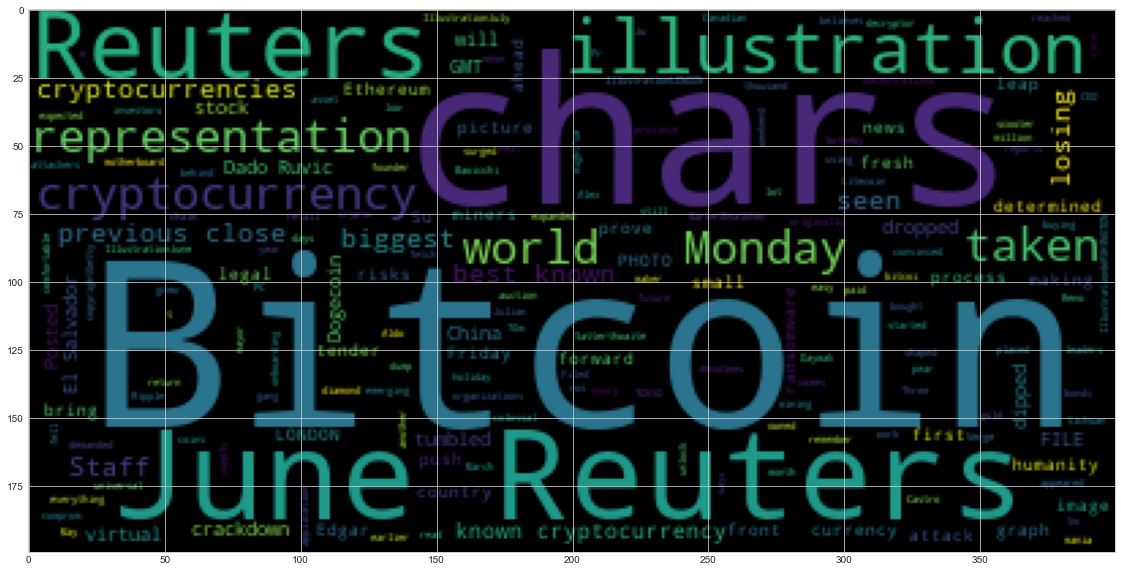

In [119]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(bitcoin_wc)

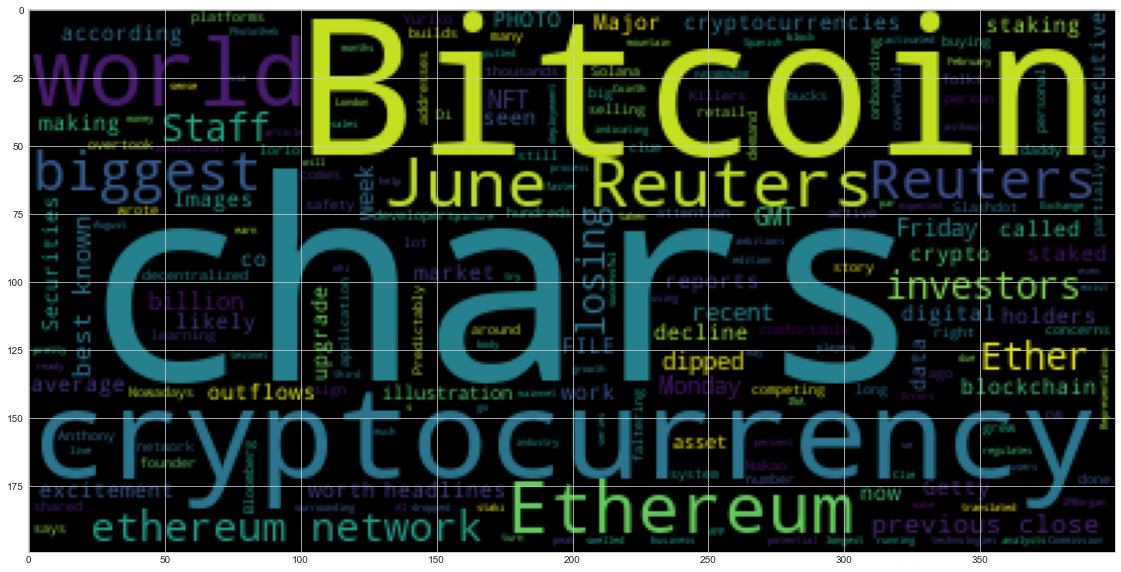

In [121]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(ethereum_wc)

## 3. Named Entity Recognition


In [122]:
import spacy
from spacy import displacy  

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm  

In [123]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER


In [ ]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!  

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

In [ ]:
# Add a title to the document
# YOUR CODE HERE!  

In [ ]:
# Render the visualization
# YOUR CODE HERE!  

In [ ]:
# List all Entities
# YOUR CODE HERE!

## Ethereum NER


In [ ]:
 # Concatenate all of the Ethereum text together
# YOUR CODE HERE!  

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

In [ ]:
# Add a title to the document
# YOUR CODE HERE!  

In [ ]:
# Render the visualization
# YOUR CODE HERE!  

In [ ]:
# List all Entities
# YOUR CODE HERE!